# Visualización



El objetivo de este notebook es presentar una manera de visualizar los apuntamientos de los satélites de la manera más descriptiva y completa posible

## Catálogo de radiofuentes

Cargamos el catálogo de radiofuentes para inspeccionar la distribución de declinaciones.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.insert(0, "..")
import gtoc8.lib as gtoc8

In [3]:
catalogue_data = np.loadtxt("../data/gtoc8_radiosources.txt", comments="%")
catalogue = pd.DataFrame(catalogue_data[:, 1:], index=catalogue_data[:, 0],
                         columns=["RA (deg)", "DEC (deg)"])
catalogue.head()

,RA (deg),DEC (deg)
1,359.92065,-88.78955
2,356.91670,-80.27817
3,64.09616,-79.25290
4,118.90179,-80.08681
5,181.02500,-82.32760


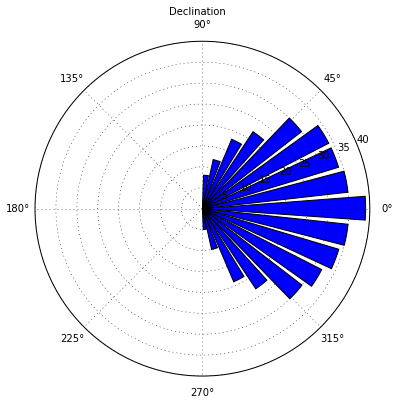

In [4]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.hist(catalogue["DEC (deg)"].values * np.pi / 180, bins=17, rwidth=.8)
fig.suptitle("Declination")

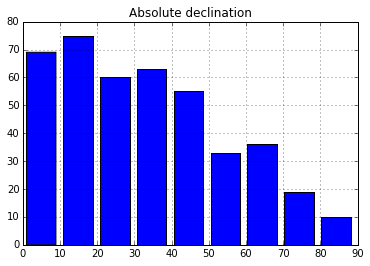

In [5]:
plt.figure()
catalogue["DEC (deg)"].abs().hist(bins=9, rwidth=.8).set_title("Absolute declination")

<div class="alert alert-warning">**Nota**: Este análisis de la declinación puede llevar a engaño. En realidad, si se pintan las radiofuentes se ve que tienen una distribución uniforme espacialmente.</div>

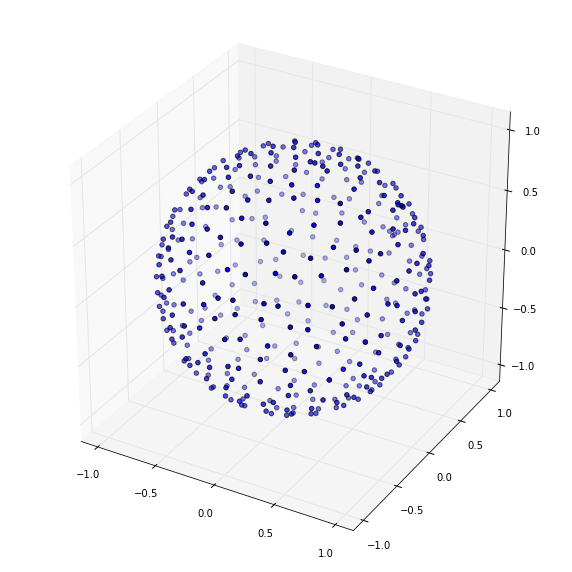

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
ax.set_zlim([-1.1,1.1])

ra = np.deg2rad(catalogue['RA (deg)'].values)
dec = np.deg2rad(catalogue['DEC (deg)'].values)
r = 1

xs = r * np.cos(ra) * np.cos(dec)
ys = r * np.sin(ra) * np.cos(dec)
zs = r * np.sin(dec)

ax.scatter(xs, ys, zs,  marker = 'o', s = 20)

**Se comprueba que las radiofuentes están distribuidas de manera relativamente uniforme.**

##Satélites

Supongamos que las posiciones cartesianas de los satélites están contenidas en los vectores s1, s2 y s3:

In [7]:
s1 = np.array((3, 4, -5))
s2 = np.array((-3, 3, 2))
s3 = np.array((-7, -1, -5))

s1d = np.dot(s1, s1)**0.5
s2d = np.dot(s2, s2)**0.5
s3d = np.dot(s3, s3)**0.5

s1a = s1/s1d
s2a = s2/s2d
s3a = s3/s3d

adim = max(s1d, s2d, s3d)

Para representar los satélites en el interior de la esfera de radio 1 que contiene las radiofuentes, podemos adimensionalizar sus posiciones con la altura del satélite más lejano a la tierra:

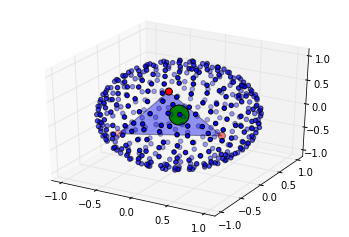

In [8]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
ax.set_zlim([-1.1,1.1])

#Radiofuentes
ra = np.deg2rad(catalogue['RA (deg)'].values)
dec = np.deg2rad(catalogue['DEC (deg)'].values)
r = 1

xs = r * np.cos(ra) * np.cos(dec)
ys = r * np.sin(ra) * np.cos(dec)
zs = r * np.sin(dec)

ax.scatter(xs, ys, zs, marker='o', s=20)
ax.scatter(0, 0, 0, marker='o', s=400, c='green')

#Triángulo 

xtri = (s1[0], s2[0], s3[0])/ adim
ytri = (s1[1], s2[1], s3[1])/ adim
ztri = (s1[2], s2[2], s3[2])/ adim

ax.add_collection3d(Poly3DCollection([zip(xtri, ytri, ztri)], alpha=.4))

#Satélites

ax.scatter(xtri, ytri, ztri, s=50, c='red')

Este diagrama al estar representando una distribución de puntos en 3D, no nos da una idea lo bastante exacta de la posición de los satélites. Para ello, podemos unir los vectores que unen la Tierra con los satélites, y prolongarlos hasta la esfera de radio 1 en la que están las radiofuentes. Para dar información de la profundidad, podemos también añadir una cruceta.

In [9]:
def vector_spheric_cross (vector, amplitude, rect_size = 0.5):
    '''
    Desde un vector, crea una cruz esférica centrada en el punto en que este corta con la esfera de radio 1.
    También devuelve un rectángulo esferico concéntrico. El objetivo es usar estas geometrías como ayuda para visualizar
    el 3D de un vector.
    '''
    s1pol = gtoc8.cartesian_to_celestial(vector)

    cross1apol = np.array((np.linspace(s1pol[0] + amplitude, s1pol[0] - amplitude, 20 ), s1pol[1] * np.ones(20)))
    cross1bpol = np.array(( s1pol[0] * np.ones(20),np.linspace(s1pol[1] + amplitude, s1pol[1] - amplitude, 20 )))
    
    rect1apol = np.array((np.linspace(s1pol[0] + amplitude * rect_size, s1pol[0] - amplitude* rect_size , 20 ),
                         (s1pol[1]+ amplitude * rect_size) * np.ones(20)))
    rect1bpol = np.array((np.linspace(s1pol[0] + amplitude * rect_size, s1pol[0] - amplitude* rect_size , 20 ),
                         (s1pol[1]- amplitude * rect_size) * np.ones(20)))
    rect1cpol = np.array(((s1pol[0] + amplitude * rect_size) * np.ones(20),
                          np.linspace(s1pol[1] + amplitude * rect_size, s1pol[1] - amplitude * rect_size, 20 )))
    rect1dpol = np.array(((s1pol[0] - amplitude * rect_size) * np.ones(20),
                          np.linspace(s1pol[1] + amplitude * rect_size, s1pol[1] - amplitude * rect_size, 20 )))


    cross1apol = np.transpose(cross1apol)
    cross1bpol = np.transpose(cross1bpol)
    
    rect1apol = np.transpose(rect1apol)
    rect1bpol = np.transpose(rect1bpol)
    rect1cpol = np.transpose(rect1cpol)
    rect1dpol = np.transpose(rect1dpol)

    cross1a = []
    cross1b = []
    
    rect = []

    for point in cross1apol :
        pointtransf = gtoc8.celestial_to_cartesian(point[0],point[1])
        cross1a.append(pointtransf)
    cross1a = np.array(cross1a)

    for point in cross1bpol :
        pointtransf = gtoc8.celestial_to_cartesian(point[0],point[1])
        cross1b.append(pointtransf)
    cross1b = np.array(cross1b)
    
    for point in rect1apol :
        pointtransf = gtoc8.celestial_to_cartesian(point[0],point[1])
        rect.append(pointtransf)
    for point in rect1dpol :
        pointtransf = gtoc8.celestial_to_cartesian(point[0],point[1])
        rect.append(pointtransf)
    for point in rect1bpol[::-1] :
        pointtransf = gtoc8.celestial_to_cartesian(point[0],point[1])
        rect.append(pointtransf)
    for point in rect1cpol[::-1] :
        pointtransf = gtoc8.celestial_to_cartesian(point[0],point[1])
        rect.append(pointtransf)
    rect = np.array(rect)
    
    return cross1a , cross1b, rect

In [10]:
eps_cross = 0.3

cross1a, cross1b, _ = vector_spheric_cross(s1a, eps_cross)
cross2a, cross2b, _ = vector_spheric_cross(s2a, eps_cross)
cross3a, cross3b, _ = vector_spheric_cross(s3a, eps_cross)

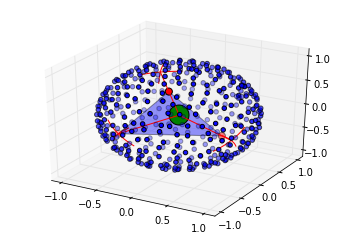

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
ax.set_zlim([-1.1,1.1])

#Radiofuentes
ra = np.deg2rad(catalogue['RA (deg)'].values)
dec = np.deg2rad(catalogue['DEC (deg)'].values)
r = 1

xs = r * np.cos(ra) * np.cos(dec)
ys = r * np.sin(ra) * np.cos(dec)
zs = r * np.sin(dec)

ax.scatter(xs, ys, zs, marker='o', s=20)
ax.scatter(0, 0, 0, marker='o', s=400, c='green')

#Triángulo 

xtri = (s1[0], s2[0], s3[0])/ adim
ytri = (s1[1], s2[1], s3[1])/ adim
ztri = (s1[2], s2[2], s3[2])/ adim

ax.add_collection3d(Poly3DCollection([zip(xtri, ytri, ztri)], alpha=.4))

#Satélites

ax.scatter(xtri, ytri, ztri, s=50, c='red')

#Líneas que unen el centro con la esfera

ax.plot((0, s1a[0]), (0, s1a[1]), (0, s1a[2]), '-', c = 'red')
ax.plot((0, s2a[0]), (0, s2a[1]), (0, s2a[2]), '-', c = 'red')
ax.plot((0, s3a[0]), (0, s3a[1]), (0, s3a[2]), '-', c = 'red')

#Cruces al final de los radios de los satelites

ax.plot(cross1a[:, 0], cross1a[:, 1], cross1a[:, 2], c = 'red')
ax.plot(cross1b[:, 0], cross1b[:, 1], cross1b[:, 2], c = 'red')
ax.plot(cross2a[:, 0], cross2a[:, 1], cross2a[:, 2], c = 'red')
ax.plot(cross2b[:, 0], cross2b[:, 1], cross2b[:, 2], c = 'red')
ax.plot(cross3a[:, 0], cross3a[:, 1], cross3a[:, 2], c = 'red')
ax.plot(cross3b[:, 0], cross3b[:, 1], cross3b[:, 2], c = 'red')


Para ayudarnos a interpretar las curvas de las crucetas, podemos dibujar el ecuador y los meridianos de los planos x=0 e y=0, así como los ejes en el interior de la esfera:

In [12]:
#Reference circunferences

equatorpol = np.transpose(np.array((np.linspace(0, 2 * np.pi, 50), np.zeros(50))))
equator = []
for point in equatorpol :
    pointtransf = gtoc8.celestial_to_cartesian(point[0],point[1])
    equator.append(pointtransf)
equator = np.array(equator)

mer1pol = np.transpose(np.array(( np.zeros(50) , np.linspace(0, 2 * np.pi, 50))))
mer1 = []
for point in mer1pol :
    pointtransf = gtoc8.celestial_to_cartesian(point[0],point[1])
    mer1.append(pointtransf)
mer1 = np.array(mer1)

mer2pol = np.transpose(np.array(( np.ones(50) * 0.5 * np.pi , np.linspace(0, 2 * np.pi, 50))))
mer2 = []
for point in mer2pol :
    pointtransf = gtoc8.celestial_to_cartesian(point[0],point[1])
    mer2.append(pointtransf)
mer2 = np.array(mer2)

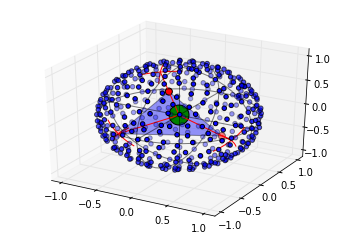

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
ax.set_zlim([-1.1,1.1])

#Radiofuentes
ra = np.deg2rad(catalogue['RA (deg)'].values)
dec = np.deg2rad(catalogue['DEC (deg)'].values)
r = 1

xs = r * np.cos(ra) * np.cos(dec)
ys = r * np.sin(ra) * np.cos(dec)
zs = r * np.sin(dec)

ax.scatter(xs, ys, zs, marker='o', s=20)
ax.scatter(0, 0, 0, marker='o', s=400, c='green')

#Triángulo 

xtri = (s1[0], s2[0], s3[0])/ adim
ytri = (s1[1], s2[1], s3[1])/ adim
ztri = (s1[2], s2[2], s3[2])/ adim

ax.add_collection3d(Poly3DCollection([zip(xtri, ytri, ztri)], alpha=.4))

#Satélites

ax.scatter(xtri, ytri, ztri, s=50, c='red')

#Líneas que unen el centro con la esfera

ax.plot((0, s1a[0]), (0, s1a[1]), (0, s1a[2]), '-', c = 'red')
ax.plot((0, s2a[0]), (0, s2a[1]), (0, s2a[2]), '-', c = 'red')
ax.plot((0, s3a[0]), (0, s3a[1]), (0, s3a[2]), '-', c = 'red')

#Cruces al final de los radios de los satelites

ax.plot(cross1a[:, 0], cross1a[:, 1], cross1a[:, 2], c = 'red')
ax.plot(cross1b[:, 0], cross1b[:, 1], cross1b[:, 2], c = 'red')
ax.plot(cross2a[:, 0], cross2a[:, 1], cross2a[:, 2], c = 'red')
ax.plot(cross2b[:, 0], cross2b[:, 1], cross2b[:, 2], c = 'red')
ax.plot(cross3a[:, 0], cross3a[:, 1], cross3a[:, 2], c = 'red')
ax.plot(cross3b[:, 0], cross3b[:, 1], cross3b[:, 2], c = 'red')

#Ecuador, meridianos y ejes
ax.plot(equator[:, 0], equator[:, 1], equator[:, 2], c = 'black', alpha = 0.5)
ax.plot(mer1[:, 0], mer1[:, 1], mer1[:, 2], c = 'black', alpha = 0.5)
ax.plot(mer2[:, 0], mer2[:, 1], mer2[:, 2], c = 'black', alpha = 0.5)
ax.plot((-1,1) , (0,0) , (0,0), c = 'black', alpha = 0.5)
ax.plot((0,0) , (-1,1) , (0,0), c = 'black', alpha = 0.5)
ax.plot((0,0) , (0,0) , (-1,1), c = 'black', alpha = 0.5)


##Apuntamiento


Por último, representamos los vectores de apuntamiento, y les añadimos su rejilla. Como este es el vector de mayor importancia, le podemos dibujar un rectángulo para mayor visualización.

In [14]:
#observation vector
obs, _ = gtoc8.observation_triangle(s1, s2, s3)
obs = obs / np.linalg.norm(obs)

print(obs)
eps_obs = 0.4
crossobj1a, crossobj1b, rectobj1 = vector_spheric_cross(obs, eps_obs)

crossobj2a, crossobj2b, rectobj2 = vector_spheric_cross(-obs, eps_obs)

[ 0.43328912 -0.86657824  0.24759378]


<IPython.core.display.Javascript object>


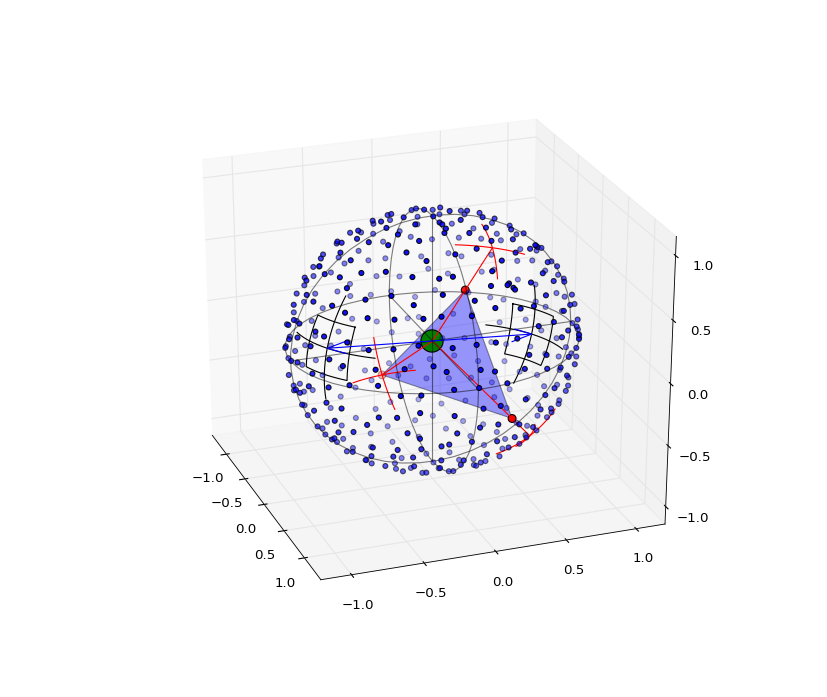

(-1.5, 1.5, -1.5, 1.5)

In [16]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
ax.set_zlim([-1.1,1.1])

#Radiofuentes
ra = np.deg2rad(catalogue['RA (deg)'].values)
dec = np.deg2rad(catalogue['DEC (deg)'].values)
r = 1

xs = r * np.cos(ra) * np.cos(dec)
ys = r * np.sin(ra) * np.cos(dec)
zs = r * np.sin(dec)

ax.scatter(xs, ys, zs, marker='o', s=20)
ax.scatter(0, 0, 0, marker='o', s=400, c='green')

#Triángulo 

xtri = (s1[0], s2[0], s3[0])/ adim
ytri = (s1[1], s2[1], s3[1])/ adim
ztri = (s1[2], s2[2], s3[2])/ adim

ax.add_collection3d(Poly3DCollection([zip(xtri, ytri, ztri)], alpha=.4))

#Satélites

ax.scatter(xtri, ytri, ztri, s=50, c='red')

#Líneas que unen el centro con la esfera

ax.plot((0, s1a[0]), (0, s1a[1]), (0, s1a[2]), '-', c = 'red')
ax.plot((0, s2a[0]), (0, s2a[1]), (0, s2a[2]), '-', c = 'red')
ax.plot((0, s3a[0]), (0, s3a[1]), (0, s3a[2]), '-', c = 'red')

#Cruces al final de los radios de los satelites

ax.plot(cross1a[:, 0], cross1a[:, 1], cross1a[:, 2], c = 'red')
ax.plot(cross1b[:, 0], cross1b[:, 1], cross1b[:, 2], c = 'red')
ax.plot(cross2a[:, 0], cross2a[:, 1], cross2a[:, 2], c = 'red')
ax.plot(cross2b[:, 0], cross2b[:, 1], cross2b[:, 2], c = 'red')
ax.plot(cross3a[:, 0], cross3a[:, 1], cross3a[:, 2], c = 'red')
ax.plot(cross3b[:, 0], cross3b[:, 1], cross3b[:, 2], c = 'red')

#Ecuador, meridianos y ejes
ax.plot(equator[:, 0], equator[:, 1], equator[:, 2], c = 'black', alpha = 0.5)
ax.plot(mer1[:, 0], mer1[:, 1], mer1[:, 2], c = 'black', alpha = 0.5)
ax.plot(mer2[:, 0], mer2[:, 1], mer2[:, 2], c = 'black', alpha = 0.5)
ax.plot((-1,1) , (0,0) , (0,0), c = 'black', alpha = 0.5)
ax.plot((0,0) , (-1,1) , (0,0), c = 'black', alpha = 0.5)
ax.plot((0,0) , (0,0) , (-1,1), c = 'black', alpha = 0.5)

#Vector de apuntamiento
ax.quiver(obs[0], obs[1], obs[2], obs[0], obs[1], obs[2],arrow_length_ratio = 0.2)
ax.quiver(-obs[0], -obs[1], -obs[2], -obs[0], -obs[1], -obs[2],arrow_length_ratio = 0.2)
ax.plot(crossobj1a[:, 0],crossobj1a[:, 1], crossobj1a[:, 2], c = 'black')
ax.plot(crossobj1b[:, 0],crossobj1b[:, 1], crossobj1b[:, 2], c = 'black')
ax.plot(rectobj1[:, 0],rectobj1[:, 1], rectobj1[:, 2], c = 'black')
ax.plot(crossobj2a[:, 0],crossobj2a[:, 1], crossobj2a[:, 2], c = 'black')
ax.plot(crossobj2b[:, 0],crossobj2b[:, 1], crossobj2b[:, 2], c = 'black')
ax.plot(rectobj2[:, 0],rectobj2[:, 1], rectobj2[:, 2], c = 'black')

ax.axis('equal')